In [6]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from pprint import pprint
import scipy.stats
import numpy as np 
import pylab 
import scipy.stats as stats
from scipy.stats import norm

In [7]:
edges = pd.read_csv(r'datasets-edu/marvel/marvel-unimodal-edges.csv')
nodes = pd.read_csv(r'datasets-edu/marvel/marvel-unimodal-nodes.csv')

#строим граф
G = nx.from_pandas_edgelist(edges, 'Source', 'Target')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 327
Number of edges: 9891
Average degree:  60.4954


In [8]:
degrees = (list(dict(G.degree()).values()))
# Все индексы уникальны, но могут быть повторяющиеся значения измерений (которые принадлежат разным индексам).
dfser = pd.DataFrame({'values':degrees},)

# 1-е решение - понимание списка
dfser['ecdf']=[sum( dfser['values'] <= x)/float(dfser['values'].size) for x in dfser['values']]

# 2-е решение - рейтинг
dfser['rank'] = dfser['values'].rank(ascending = 0)
dfser['ecdf_r']=(len(dfser)-dfser['rank']+1)/len(dfser)

print(dfser)
print(type(dfser))

     values      ecdf   rank    ecdf_r
0       101  0.844037   52.0  0.844037
1        62  0.703364  100.0  0.697248
2        25  0.195719  267.5  0.185015
3       162  0.926606   25.0  0.926606
4       155  0.917431   28.0  0.917431
..      ...       ...    ...       ...
322      26  0.220183  259.5  0.209480
323      27  0.235474  253.0  0.229358
324      14  0.018349  322.5  0.016820
325      16  0.036697  317.5  0.032110
326      13  0.012232  324.0  0.012232

[327 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


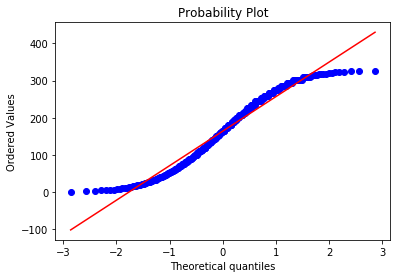

In [18]:
stats.probplot(dfser['rank'], dist='norm', plot=pylab)
pylab.show()

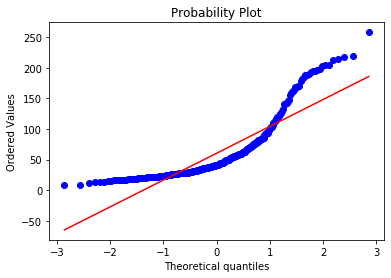

In [20]:
stats.probplot(degrees, dist='norm', plot=pylab)
pylab.show()

### Выполните тест Колмогорова-Смирнова на предмет пригодности.
Выполняется проверка распределения G (x) наблюдаемой случайной величины по отношению к заданному распределению F (x). По нулевой гипотезе оба распределения идентичны: G (x) = F (x). Альтернативная гипотеза может быть «двусторонняя» (по умолчанию), «меньше» или «больше». Тест KS действителен только для непрерывных распределений.
### Результат выполнения теста Колмогорова-Смирнова. 
Первое значение – это статистика испытаний, а второе значение – значение p. 
Если p < 0.05, мы можем отклонить нуль и заключить, что наш пример распределения не идентичен нормальному распределению.

In [12]:
test = stats.kstest(np.random.normal(0,1,327),'norm')
print(test)

KstestResult(statistic=0.03286315271815002, pvalue=0.8717790119861668)


In [19]:
scipy.stats.kstest(degrees, 'norm', args=(5, 10))

KstestResult(statistic=0.8703136771576663, pvalue=3.9317705100097487e-290)

In [13]:
scipy.stats.kstest(degrees, lambda x: scipy.stats.norm.cdf(x, loc=5, scale=10))

KstestResult(statistic=0.8703136771576663, pvalue=3.9317705100097487e-290)

In [21]:
scipy.stats.ks_2samp(degrees, dfser['rank'])

Ks_2sampResult(statistic=0.5504587155963303, pvalue=7.225460358136416e-46)

In [28]:
# Create the random variables with mean 5, and sd 3
x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)

# Perform test KS test against a normal distribution with
# mean = 5 and sd = 3

# Null Accepted
print(scipy.stats.kstest(x_10, 'norm', args=(5, 3)))
# Null Accepted
print(scipy.stats.kstest(x_50, 'norm', args=(5, 3)))
# Null Accepted
print(scipy.stats.kstest(x_100, 'norm', args=(5, 3)))
# Null Accepted
print(scipy.stats.kstest(x_1000, 'norm', args=(5, 3)))

KstestResult(statistic=0.19984363695725105, pvalue=0.8193535812796217)
KstestResult(statistic=0.1689706656753434, pvalue=0.10219598547522926)
KstestResult(statistic=0.08931528392746635, pvalue=0.38243455430339246)
KstestResult(statistic=0.028144427345627776, pvalue=0.40261983606177265)


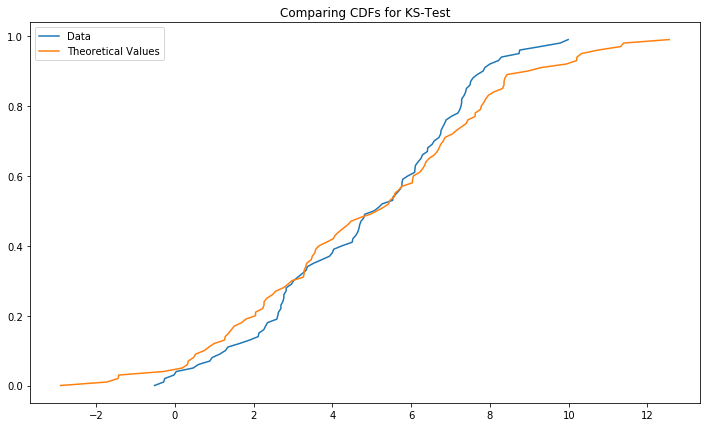

In [32]:
#Давайте посмотрим, как это будет выглядеть графически, при сравнении CDF выборки с выборочной нормальной 
#переменной с тем же средним и стандартным отклонением.

def ks_plot_norm(data):
    length = len(data)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(x_100), np.linspace(0, 1, length, endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=5, scale=3, size=100)), np.linspace(0, 1, length, endpoint=False))
    plt.legend('top right')
    plt.legend(['Data', 'Theoretical Values'])
    plt.title('Comparing CDFs for KS-Test')
    
ks_plot_norm(x_100)